## 1.Importing the libraries


In [1]:
import pandas as pd

## 2.Importing the dataset

In [2]:
data =pd.read_csv('/home/abhi/Downloads/heart.csv')

## 3.Taking Care of Missing Values

In [3]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# 4.Taking care of Duplicate Values

In [4]:
data_dup = data.duplicated().any()

In [5]:
data_dup

True

In [6]:
data = data.drop_duplicates()

In [7]:
data_dup = data.duplicated().any()

In [8]:
data_dup

False

# 5.Data Processing

In [9]:
cate_val = []
cont_val = []

for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [10]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [11]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# 6.Encoding Categorical Data

In [12]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [13]:
data['cp'].unique()

array([0, 1, 2, 3])

In [14]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns = cate_val,drop_first = True)

In [15]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


# 7.Feature Scaling

In [16]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
st = StandardScaler()

In [19]:
data[cont_val] = st.fit_transform(data[cont_val])

In [20]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


# 8.Spiliting The Dataset into The Training Set And Test Set

In [21]:
X = data.drop('target',axis = 1)

In [22]:
y = data['target']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [25]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

# 9.Logistic Regression

In [26]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [29]:
y_pred1 = log.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

# 10.SVM

In [32]:
from sklearn import svm

In [33]:
svm = svm.SVC()

In [34]:
svm.fit(X_train,y_train)

SVC()

In [35]:
y_pred2 = svm.predict(X_test)

In [36]:
accuracy_score(y_test,y_pred2)

0.8032786885245902

# 11.KNeighbors Classifier

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn = KNeighborsClassifier()

In [39]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [40]:
y_pred3 = knn.predict(X_test)

In [41]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

# Non-Linear ML Algorithms

In [42]:
data = pd.read_csv('/home/abhi/Downloads/heart.csv')

In [43]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [44]:
data = data.drop_duplicates()

In [45]:
data.shape

(302, 14)

In [46]:
X = data.drop('target',axis =1)
y = data['target']

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# 12.Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dt = DecisionTreeClassifier()

In [50]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
y_pred4 = dt.predict(X_test)

In [52]:
accuracy_score(y_test,y_pred4)

0.7049180327868853

# 13.Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf = RandomForestClassifier()

In [55]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [56]:
y_pred5 = rf.predict(X_test)

In [57]:
accuracy_score(y_test,y_pred5)

0.8524590163934426

# 14.Gradient Boosting Classifier

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

In [59]:
gbc = GradientBoostingClassifier()

In [60]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [61]:
y_pred6 = gbc.predict(X_test)

In [62]:
accuracy_score(y_test,y_pred6)

0.8032786885245902

In [63]:
final_data =pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                          'ACC':[accuracy_score(y_test,y_pred1),
                                 accuracy_score(y_test,y_pred2),
                                 accuracy_score(y_test,y_pred3),
                                 accuracy_score(y_test,y_pred4),
                                 accuracy_score(y_test,y_pred5),
                                 accuracy_score(y_test,y_pred6)]})

In [64]:
final_data

,Models,ACC
0,LR,0.786885
1,SVM,0.803279
2,KNN,0.737705
3,DT,0.704918
4,RF,0.852459
5,GB,0.803279


In [65]:
import seaborn as sns

<AxesSubplot: xlabel='Models', ylabel='ACC'>

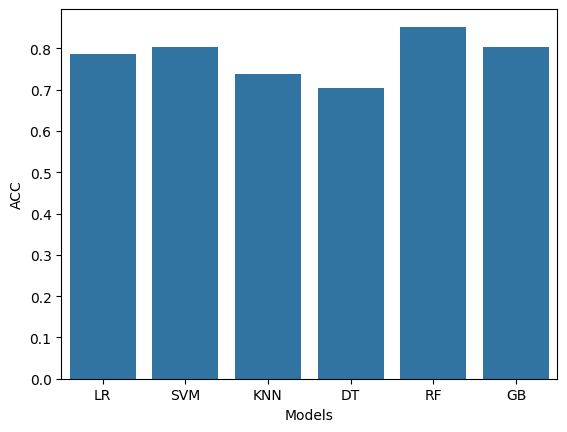

In [66]:
sns.barplot(x ='Models', y='ACC', data = final_data)

In [67]:
X = data.drop('target',axis=1)
y =data['target']

In [68]:
X.shape

(302, 13)

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

# 15.Prediction on New Data

In [71]:
import pandas as pd

In [72]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3,
},index=[0])

In [73]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [74]:
p = rf.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

No Disease


# 16.Save Model Using Joblib

In [75]:
import joblib

In [76]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [77]:
model = joblib.load('model_joblib_heart')

In [78]:
model.predict(new_data)

array([0])

# GUI 

In [79]:
from tkinter import *

In [80]:
import joblib

In [81]:
import warnings

In [82]:
from sklearn.exceptions import DataConversionWarning

In [83]:
warnings.filterwarnings("ignore",category=DataConversionWarning)

In [ ]:
def show_entry_fields():
    p1 = int(e1.get())
    p2 = int(e2.get())
    p3 = int(e3.get())
    p4 = int(e4.get())
    p5 = int(e5.get())
    p6 = int(e6.get())
    p7 = int(e7.get())
    p8 = int(e8.get())
    p9 = int(e9.get())
    p10 = int(e10.get())
    p11 = int(e11.get())
    p12 = int(e12.get())
    p13 = int(e13.get())
    
    model = joblib.load('model_joblib_heart')
    result = model.predict([[p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13]])
    
    result_label.config(text="Possibility of Heart Disease" if result == 1 else "No Heart Disease")

# Create the main Tkinter window
master = Tk()
master.title("Heart Disease Prediction System")

# Create labels and entry fields
Label(master, text="Heart Disease Prediction system", bg="black", fg="white").grid(row=0, columnspan=2)
Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP ").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)

# Create Entry widgets
e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

# Grid layout for Entry widgets
e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)

# Button for prediction
Button(master, text='Predict', command=show_entry_fields).grid(row=14, column=0, columnspan=2)

# Label for displaying the result
result_label = Label(master, text="")
result_label.grid(row=15, column=0, columnspan=2)

# Start the Tkinter main loop
master.mainloop()
